Context:
Now we are going into another aspect of quality which is health but from the perspective of a public health agency instead of a consumer. The Department of Public Health preforms annual health inspections and uses as inspection scoring system to rate each restaurant. The health inspector will calculate a score based on the violations observed. According to sfdph.org, health violations fall into three categories:

High Risk: Violations that directly relate to the transmission of food borne illnesses, the adulteration of food products and the contamination of food-contact surfaces.
Moderate Risk: Violations that are of a moderate risk to the public health and safety.
Low Risk: Violations that are low risk or have no immediate risk to the public health and safety.

The inspections also provided an inspection score for each food establishment. The scores were a number from 0 - 100. The following explains the scores:

Greater than 90: GOOD (Only lower-risk health and safety violations observed. May have high-risk violations.)
Between 89-90: ADEQUATE (Several violations observed. May have high-risk violations.)
Between 71-85: NEEDS IMPROVEMENT (Multiple violations observed. Typically, several high-risk violations.)
Less than 71: POOR (Multiple violations observed. Typically, several high-risk violations.)


Methodology:
In terms of assessning health risk, we need to choose a metric to use (like inspection score or the risk_category) To choose a category , we decided to look at the category that fits the data better, i.e. the category that most resturants had.

The following uses the SOAP API from the health inspection website for SF : https://data.sfgov.org/widgets/pyih-qa8i

In [3]:
# Our usual data science tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp # other science tools
import seaborn as sns

%matplotlib inline

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache

requests_cache.install_cache("../craigslist")

def get_api():
    response = requests.get(" https://data.sfgov.org/resource/sipz-fjte.json")
    response.raise_for_status()
    response = response.json()
    return response
result = get_api()
result

[{'business_address': '1416 POWELL ST',
  'business_city': 'San Francisco',
  'business_id': '99342',
  'business_name': 'LAI HONG RESTAURANT',
  'business_postal_code': '94133',
  'business_state': 'CA',
  'inspection_date': '2019-02-22T00:00:00.000',
  'inspection_id': '99342_20190222',
  'inspection_type': 'New Ownership'},
 {'business_address': '173 Eddy St',
  'business_city': 'San Francisco',
  'business_id': '96718',
  'business_name': 'PALACE OF SPICES',
  'business_postal_code': '94102',
  'business_state': 'CA',
  'inspection_date': '2018-09-04T00:00:00.000',
  'inspection_id': '96718_20180904',
  'inspection_score': '83',
  'inspection_type': 'Routine - Unscheduled',
  'risk_category': 'Low Risk',
  'violation_description': 'Unclean or degraded floors walls or ceilings',
  'violation_id': '96718_20180904_103154'},
 {':@computed_region_ajp5_b2md': '30',
  ':@computed_region_bh8s_q3mv': '29490',
  ':@computed_region_fyvs_ahh9': '27',
  ':@computed_region_p5aj_wyqh': '6',
  ':@

In [4]:
def get_risk(array):
    risk = []
    count = 0
    for each in array:
        if 'risk_category' not in each:
            count = count + 1
            continue
        print(each["risk_category"])
    print("total categories that don't have risk: ", count)
    return count

  
def get_score(array):
    risk = []
    count = 0
    for each in array:
        if 'inspection_score' not in each:
            count = count + 1
            continue
        print(each["inspection_score"])
    print("total categories that don't have inspection_score: ", count)
    return count

    

In [41]:
get_risk(result)

Low Risk
Moderate Risk
Low Risk
Moderate Risk
Low Risk
Low Risk
Moderate Risk
Moderate Risk
Moderate Risk
Low Risk
Low Risk
Moderate Risk
Moderate Risk
High Risk
Moderate Risk
Moderate Risk
Moderate Risk
Low Risk
Low Risk
Low Risk
High Risk
Low Risk
Low Risk
Moderate Risk
Moderate Risk
Moderate Risk
Moderate Risk
High Risk
High Risk
Moderate Risk
Low Risk
Moderate Risk
Moderate Risk
Moderate Risk
High Risk
Moderate Risk
Low Risk
Moderate Risk
High Risk
Moderate Risk
Low Risk
High Risk
High Risk
Low Risk
Low Risk
High Risk
Moderate Risk
Moderate Risk
High Risk
Moderate Risk
Moderate Risk
Moderate Risk
Low Risk
Moderate Risk
Low Risk
Low Risk
Low Risk
Moderate Risk
Moderate Risk
Moderate Risk
Low Risk
High Risk
Moderate Risk
Moderate Risk
Low Risk
High Risk
Low Risk
Low Risk
Moderate Risk
High Risk
Low Risk
Low Risk
Low Risk
Moderate Risk
Low Risk
High Risk
Low Risk
Low Risk
Low Risk
High Risk
Moderate Risk
Low Risk
Moderate Risk
Moderate Risk
Low Risk
High Risk
Moderate Risk
Low Risk
Lo

In [43]:
get_score(result)

83
96
81
85
94
86
96
87
100
98
100
90
100
100
92
79
85
90
96
65
90
100
100
74
86
86
82
80
74
81
80
100
91
86
92
92
92
80
80
93
96
73
87
91
80
85
92
93
88
74
82
100
88
100
87
82
92
82
70
85
96
79
83
96
80
85
94
77
78
96
83
78
92
72
85
94
90
86
72
83
74
85
83
92
61
81
83
90
100
82
70
74
88
100
81
86
96
70
90
80
82
78
72
80
74
86
74
68
90
81
72
61
65
94
92
94
90
88
88
80
83
70
72
80
72
90
72
88
91
73
86
90
85
92
87
70
90
88
90
68
96
87
77
88
83
88
70
80
100
77
70
93
94
74
96
80
94
62
90
74
80
83
86
90
94
77
88
76
94
100
85
98
88
92
82
81
96
77
94
82
81
94
87
100
87
89
100
83
81
86
92
100
90
98
70
84
92
92
84
87
88
94
72
88
70
75
100
79
91
88
81
91
98
90
92
88
78
74
83
94
86
94
93
90
72
83
88
88
90
86
84
92
81
94
65
100
71
88
81
90
76
92
89
73
72
87
65
94
92
92
91
88
82
92
89
82
88
96
90
82
86
94
78
85
76
86
85
83
79
86
89
91
88
90
100
92
76
87
88
96
90
94
94
96
86
85
89
88
88
65
90
81
98
93
81
88
78
88
74
92
86
75
68
85
80
92
89
76
84
84
72
88
89
92
81
80
96
92
88
90
80
98
92
100
72
98
89

We can see that there are 44 more restuarants that have the risk cateory assigned, we we will start off using that as a metric to determine the health of the food at a restauarant. 

In [5]:
Richmond = [94118, 94121]
Marina = [94123,94129]
Nob_Hill = [94108,94109,94111,94133]
Sunset = [94116,94122]
Haight = [94117,94115]
Market = [94102,94103,94104,94105]
Twin_Peaks = [94127,94131,94132]
Castro = [94114]
Mission = [94107,94110,94158]
Portola = [94112,94124,94134]
def get_risk_zipcode(array):
    zipcode = []
    risk = []
    district = []
    for each in array:
        if 'risk_category' not in each:
            continue
        if 'business_postal_code' not in each:
            continue

        if int(each["business_postal_code"]) in Richmond:
            district.append("Richmond")
        elif int(each["business_postal_code"]) in Marina:
            district.append("Marina")
        elif int(each["business_postal_code"]) in Nob_Hill:
            district.append("Nob_Hill")
        elif int(each["business_postal_code"]) in Sunset:
            district.append("Sunset")
        elif int(each["business_postal_code"]) in Haight:
            district.append("Haight")
        elif int(each["business_postal_code"]) in Market:
            district.append("Market")
        elif int(each["business_postal_code"]) in Twin_Peaks:
            district.append("Twin_Peaks")
        elif int(each["business_postal_code"]) in Castro:
            district.append("Castro")
        elif int(each["business_postal_code"]) in Mission:
            district.append("Mission")
        elif int(each["business_postal_code"]) in Portola:
            district.append("Portola")
        else:
            print(int(each["business_postal_code"]))
#             district.append("None")
            continue
        risk.append(each["risk_category"])
        zipcode.append(each["business_postal_code"])
    d = {'zipcode': zipcode, 'risk': risk, 'district': district}  
    df = pd.DataFrame(data=d)
    return df



In [8]:
import matplotlib.pyplot
import seaborn as sns
from pandas import DataFrame
import numpy as np

df = get_risk_zipcode(result)
print(df['risk'][0] == 'Low Risk')
df_low = df[df['risk'] == 'Low Risk']
df_mod = df[df['risk'] == 'Moderate Risk']
df_high = df[df['risk'] == 'High Risk']


95132
94544
True


NOTE: there were two zipcodes that were not included in our San Franciscio District Zipcodes (94544 and 95132). To further investigate whether or not they are outliers or if we should've included these zipcodes, we reaseached where these places are.

94544 is a zipcode in Hayward so it was clearly an outlier and should be removed from the data set. 
95132 however is the zipcode of a place in San Jose that had "The San Francisco Bay Area Gold League". The similarity in the name "San Francisco" could explain why this data point eaccidently ended up in our data set, howevere since it is still located in San Jose, we must discard this point. 

Results:

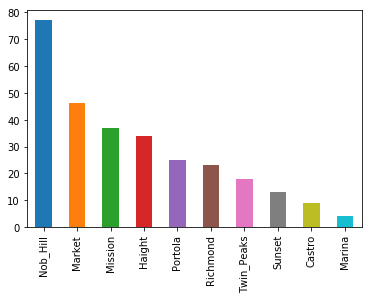

In [7]:
df_low['district'].value_counts().plot('bar')

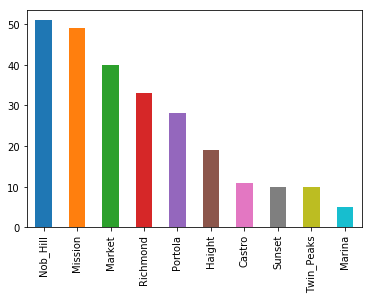

In [65]:

df_mod['district'].value_counts().plot('bar')


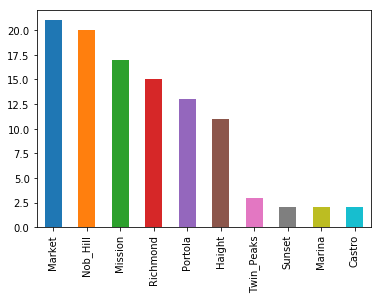

In [66]:
df_high['district'].value_counts().plot('bar')

In [186]:
'''Convert low moderate high to 0 1 2'''
def get_average_plots(data_frame):
    risk_num = []

    for each in df['risk']:
        if each == "Low Risk":
            risk_num.append(0)
        elif each == "Moderate Risk":
            risk_num.append(1)
        elif each == "High Risk":
            risk_num.append(2)
        else:
            print("error")
            risk_num.append(10)
    d = { 'risk_num': risk_num, 'district': df['district']}  
    df_new = pd.DataFrame(data=d)
    return df_new
df_new=get_average_plots(df)
df_new



,risk_num,district
0,0,Market
1,1,Haight
2,0,Nob_Hill
3,1,Richmond
4,0,Richmond
5,0,Twin_Peaks
6,1,Sunset
7,1,Mission
8,1,Haight
9,0,Nob_Hill


In [131]:

###Get the average for each district!
# df_low = df[df['risk'] == 'Low Risk']
df_Richmond = df_new[df_new['district'] == 'Richmond']
df_Marina = df_new[df_new['district'] == 'Marina']
df_Nob_Hill = df_new[df_new['district'] == 'Nob_Hill']
df_Sunset = df_new[df_new['district'] == 'Sunset']
df_Haight = df_new[df_new['district'] == 'Haight']
df_Market = df_new[df_new['district'] == 'Market']
df_Twin_Peaks = df_new[df_new['district'] == 'Twin_Peaks']
df_Castro = df_new[df_new['district'] == 'Castro']
df_Mission = df_new[df_new['district'] == 'Mission']
df_Portola = df_new[df_new['district'] == 'Portola']
df_Castro

,risk_num,district
62,2,Castro
77,1,Castro
124,1,Castro
131,1,Castro
136,1,Castro
141,0,Castro
180,1,Castro
194,0,Castro
200,0,Castro
234,0,Castro


In [187]:


df_new2 = pd.pivot_table(df_new, index='district', columns='risk_num', aggfunc=len, fill_value=0)
df_new2['sum'] = df_new2[df_new2.columns].sum(axis=1)
# df_new2['avg'] = df_new2['sum'] / (len(df_new2.columns) - 1)
df_new2

risk_num,0,1,2,sum
district,,,,
Castro,9,11,2,22
Haight,34,19,11,64
Marina,4,5,2,11
Market,46,40,21,107
Mission,37,49,17,103
Nob_Hill,77,51,20,148
Portola,25,28,13,66
Richmond,23,33,15,71
Sunset,13,10,2,25


In [216]:
def get_percentages(df):
    df['low_risk'] = df[0]/df['sum']
    df['moderate_risk'] = df[1]/df['sum']
    df['high_risk'] = df[2]/df['sum']

df_new3 = df_new2
df_new3['low_risk'] = 0
df_new3['moderate_risk'] = 0
df_new3['high_risk'] = 0

get_percentages(df_new3)
df_new3


risk_num,0,1,2,sum,low_risk,moderate_risk,high_risk
district,,,,,,,
Castro,9,11,2,22,0.409091,0.500000,0.090909
Haight,34,19,11,64,0.531250,0.296875,0.171875
Marina,4,5,2,11,0.363636,0.454545,0.181818
Market,46,40,21,107,0.429907,0.373832,0.196262
Mission,37,49,17,103,0.359223,0.475728,0.165049
Nob_Hill,77,51,20,148,0.520270,0.344595,0.135135
Portola,25,28,13,66,0.378788,0.424242,0.196970
Richmond,23,33,15,71,0.323944,0.464789,0.211268
Sunset,13,10,2,25,0.520000,0.400000,0.080000


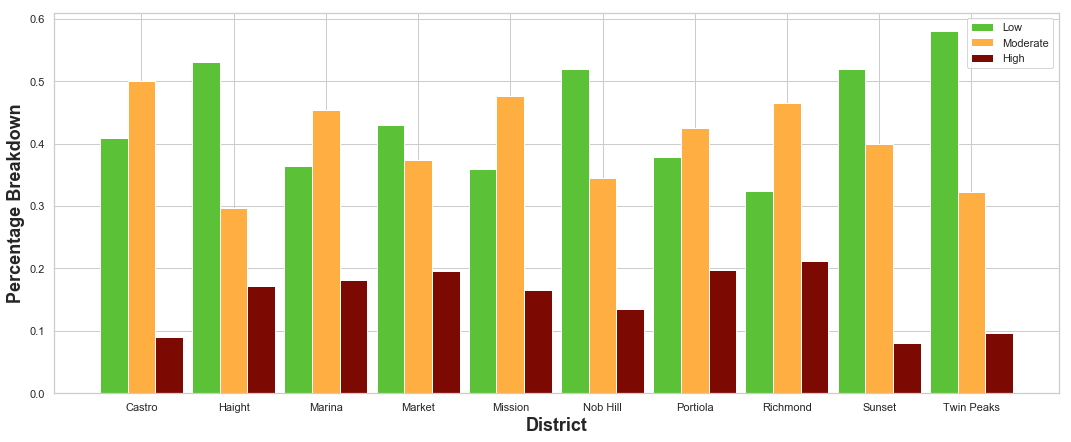

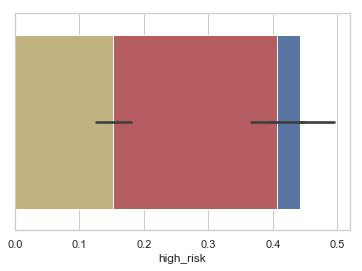

In [325]:

#Graph the districts
next(df_new3.iterrows())[1]

district = []
low = []
med = []
high = []

for index, row in df_new3.head(n=10).iterrows():
#     print(index, row)
    perc = []
    low.append(row['low_risk'])
    med.append(row['moderate_risk'])
    high.append(row['high_risk'])
    perc.append(row['low_risk'])
    perc.append(row['moderate_risk'])
    perc.append(row['high_risk'])
    district.append(perc)

barWidth = 0.3
f, ax = plt.subplots(figsize=(18,7))
# set height of bar
bars1 = low
bars2 = med
bars3 = high
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#5BC238', width=barWidth, edgecolor='white', label='Low')
plt.bar(r2, bars2, color='#ffAE42', width=barWidth, edgecolor='white', label='Moderate')
plt.bar(r3, bars3, color='#7C0A02', width=barWidth, edgecolor='white', label='High')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['Castro', 'Haight', 'Marina', 'Market', 'Mission', 'Nob Hill', 'Portiola', 'Richmond', 'Sunset', 'Twin Peaks'])
 
# Create legend & Show graphic
plt.xlabel('District', fontsize=18,fontweight='bold')
plt.ylabel('Percentage Breakdown', fontsize=18,fontweight='bold')

plt.legend()
plt.show()


sns.set(style="whitegrid")
# f, ax = plt.subplots(figsize=(25, 1))
sns.barplot(x="low_risk", data=df_new3,
            label="Total", color="b")
sns.barplot(x="moderate_risk", data=df_new3,
            label="Total", color="r")
sns.barplot(x="high_risk", data=df_new3,
            label="high_risk Total", color="y")


Observations and Comments

Which districts were the cleanest?

The district that had the highest percentage of 'low risk' violations were twin peaks. Looking at the highest percent of low risks is important because it means less moderate and high risks.  Furthermore, it has the second lowest moderate risks as well, making it a very 'safe' district to eat at.

When looking at only the high risks however, we can see that the Sunset district and Castro district and Twin Peaks follow as the 3 districts with the lowest high risks respectively. These three districts have populations of 99, 74 and 31 thousand which comparatively are lower population areas. Also it is noteabe that castro is a very small area in San Francisco (only consits of one zipcode) while sunset and twin peas have 2 -3 zip code areas.

Which districts weren't  the cleanest?
Now the districts had bad health inspection ratings are Richmond and Market district. Almost 22% of food establishments in Richmond fall in the 'high risk category', and compared to all other districts, this category is the highest. Similarly Marlet has around 1 in 5 food establshments rated as 'high risk' places. Recall that high risk category means the restaurant has violations that directly relate to the transmission of food borne illnesses, and the contamination of food-contact surfaces. In other words it might be a good idea to advise consumers to be cautions when eating in the Richmond and Market district.